## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random

In [2]:
#read in the data

chicago_data = pd.read_csv("chicago_2017.csv")
chicago_weather = pd.read_csv("weather_hourly_chicago.csv")

### Some Information about the data set

In [3]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829014 entries, 0 to 3829013
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.7+ MB


In [4]:
chicago_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


# Bike Usage

In [5]:
chicago_data.describe()

,start_station_id,end_station_id,bike_id
count,3.829014e+06,3.829014e+06,3.829014e+06
mean,1.803509e+02,1.805161e+02,3.425115e+03
std,1.328194e+02,1.329273e+02,1.861236e+03
min,2.000000e+00,2.000000e+00,1.000000e+00
25%,7.400000e+01,7.400000e+01,1.803000e+03
50%,1.560000e+02,1.560000e+02,3.583000e+03
75%,2.680000e+02,2.680000e+02,5.063000e+03
max,6.260000e+02,6.260000e+02,6.471000e+03


In [6]:
chicago_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,3/31/2017 23:59:07,4/1/2017 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,3/31/2017 23:56:25,4/1/2017 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,3/31/2017 23:55:33,4/1/2017 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,3/31/2017 23:54:46,3/31/2017 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,3/31/2017 23:53:33,4/1/2017 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber
5,3/31/2017 23:51:17,3/31/2017 23:55:19,143,289,Sedgwick St & Webster Ave,Wells St & Concord Ln,3536,Subscriber
6,3/31/2017 23:51:16,3/31/2017 23:57:17,81,41,Daley Center Plaza,Federal St & Polk St,5111,Subscriber
7,3/31/2017 23:50:26,3/31/2017 23:56:20,56,77,Desplaines St & Kinzie St,Clinton St & Madison St,1579,Subscriber
8,3/31/2017 23:50:25,3/31/2017 23:55:24,210,69,Ashland Ave & Division St,Damen Ave & Pierce Ave,3914,Subscriber
9,3/31/2017 23:49:58,4/1/2017 00:09:31,117,29,Wilton Ave & Belmont Ave,Noble St & Milwaukee Ave,5455,Subscriber


**No missing data** --> all parametes have 3 829 014 values

In [7]:
#chicago_data["travel_delta"] = pd.to_datetime --> convert timedelta to seconds so that mean can be calculated

### Add new columns to the Dataframe

In [8]:
chicago_data['start_time']= pd.to_datetime(chicago_data['start_time'])

In [9]:
chicago_data['end_time'] = pd.to_datetime(chicago_data['end_time'])

In [10]:
chicago_data['travel_delta'] = (chicago_data['end_time']-chicago_data['start_time'])

In [11]:
chicago_data.sort_values(['start_time'], inplace = True)

In [12]:
chicago_data["Weekday"] = chicago_data['start_time'].dt.weekday

In [13]:
chicago_data["Hour"] = chicago_data['start_time'].dt.hour

In [14]:
chicago_data["Date"] = chicago_data['start_time'].dt.date

In [15]:
number_bikes = len(chicago_data['bike_id'].unique())
print("The overall number of bikes is {}".format(number_bikes))

The overall number of bikes is 6243


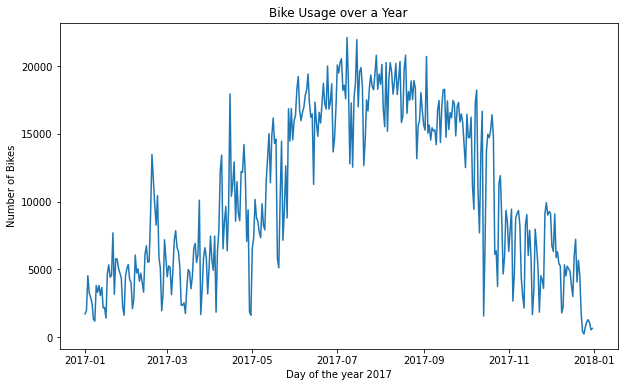

In [16]:
chicago_data_Date_avail = chicago_data.groupby("Date")['bike_id'].count()
chicago_data_Date_avail = pd.DataFrame(chicago_data_Date_avail)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chicago_data_Date_avail)

ax.set_title('Bike Usage over a Year')
ax.set_ylabel("Number of Bikes")
ax.set_xlabel("Day of the year 2017")
plt.show()

### Hier vielleicht nochmal dasselbe mit einem Wochenschnitt (damit weniger Varianz in den Daten ist)

In [17]:
chicago_data_Hour_avail = chicago_data.groupby(["Date","Hour"])['bike_id'].count()
chicago_data_Hour_avail =pd.DataFrame(chicago_data_Hour_avail)

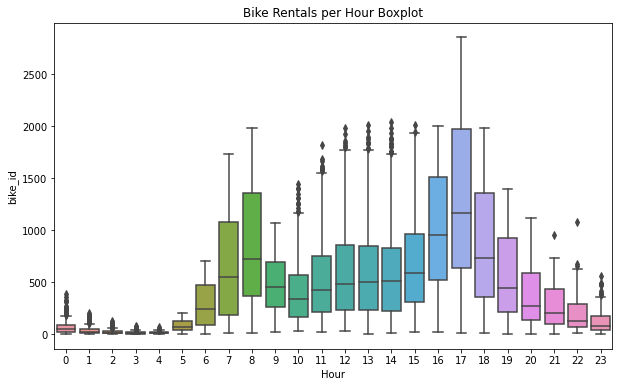

In [18]:
fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = chicago_data_Hour_avail.index.get_level_values("Hour"), y =chicago_data_Hour_avail['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Hour Boxplot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

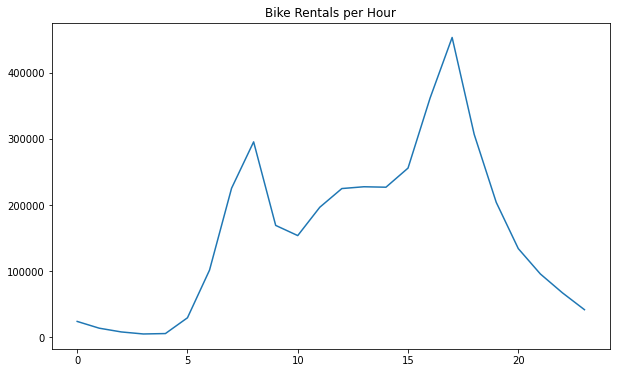

In [19]:
chicago_data_Hour_avail = chicago_data.groupby(['Hour'])['bike_id'].count()
chicago_data_Hour_avail = pd.DataFrame(chicago_data_Hour_avail)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chicago_data_Hour_avail)

ax.set_title('Bike Rentals per Hour')
plt.show

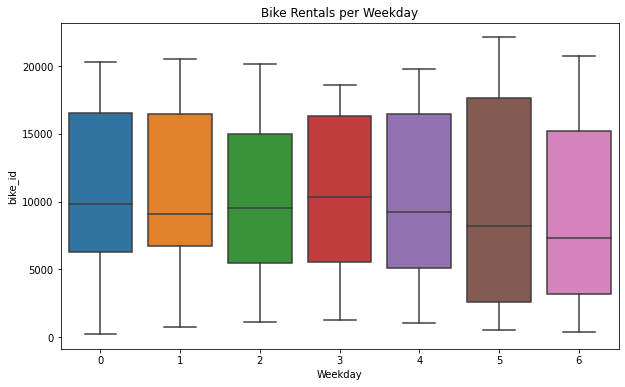

In [20]:
chicago_data_Weekday_avail = chicago_data.groupby(['Date', 'Weekday'])['bike_id'].count()
chicago_data_Weekday_avail = pd.DataFrame(chicago_data_Weekday_avail)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = chicago_data_Weekday_avail.index.get_level_values('Weekday'), y =chicago_data_Weekday_avail['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Weekday')
plt.show()

In [21]:
chicago_data_duration = chicago_data.groupby("Date")["travel_delta"].sum() #sum is wrong?=
chicago_data_duration = pd.DataFrame(chicago_data_duration)

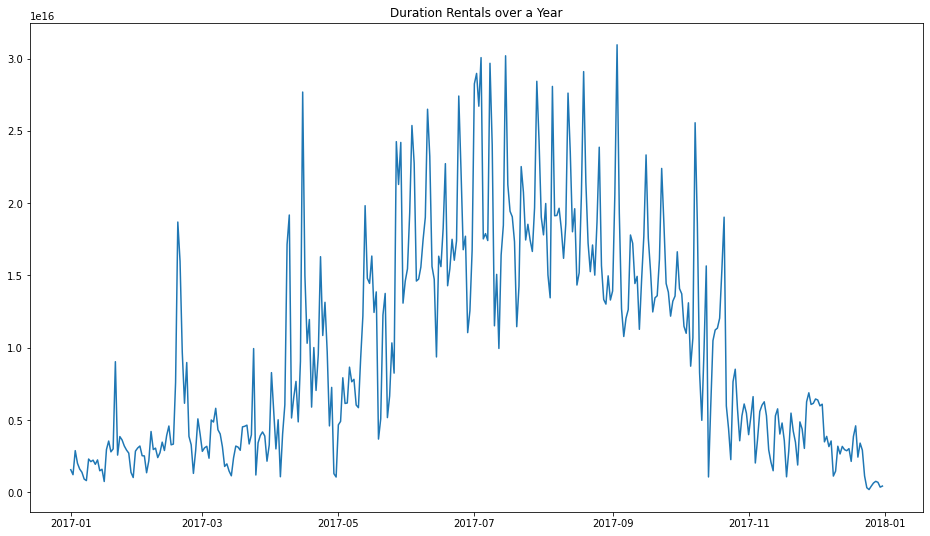

In [22]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_duration)

ax.set_title('Duration Rentals over a Year')
plt.show()

Ideen
- als weitere Dimension noch die Länge der Reise (am Wochende eher länger oder kürzere Touren)
- 

# Weather

In [23]:
chicago_weather.head(30)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0
3,2015-01-02 04:00:00,-3.3,-3.3,0.0
4,2015-01-02 05:00:00,-4.4,-4.4,0.0
5,2015-01-02 06:00:00,-5.0,-5.0,0.0
6,2015-01-01 07:00:00,-8.3,-8.3,0.0
7,2015-01-01 08:00:00,-8.9,-8.9,0.0
8,2015-01-01 09:00:00,-8.9,-8.9,0.0
9,2015-01-01 10:00:00,-9.4,-9.4,0.0


In [24]:
chicago_weather['date_time']=pd.to_datetime(chicago_weather['date_time'])

In [25]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chicago_weather_2017 = chicago_weather[(chicago_weather['date_time']>=first_date)&(chicago_weather["date_time"] <= last_date)]

In [26]:
chicago_weather_2017.sort_values(by = "date_time", inplace = True)

<ipython-input-26-0c61a4185a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017.sort_values(by = "date_time", inplace = True)


In [27]:
chicago_weather_2017['Date']= chicago_weather_2017["date_time"].dt.date

<ipython-input-27-dc2a551882f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Date']= chicago_weather_2017["date_time"].dt.date


In [28]:
chicago_weather_2017['Weekday']= chicago_weather_2017["date_time"].dt.weekday

<ipython-input-28-bfecda6ec4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Weekday']= chicago_weather_2017["date_time"].dt.weekday


In [29]:
chicago_weather_2017['Hour']= chicago_weather_2017["date_time"].dt.hour

<ipython-input-29-f26ad119289e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Hour']= chicago_weather_2017["date_time"].dt.hour


In [30]:
chicago_weather_2017['Month']= chicago_weather_2017["date_time"].dt.month

<ipython-input-30-c9653efbc821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Month']= chicago_weather_2017["date_time"].dt.month


In [31]:
chicago_weather_2017["mean_temp"] = (chicago_weather_2017['max_temp']+chicago_weather_2017['min_temp'])/2

<ipython-input-31-c1a66da8a464>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017["mean_temp"] = (chicago_weather_2017['max_temp']+chicago_weather_2017['min_temp'])/2


In [32]:
chicago_weather_2017.head()

,date_time,max_temp,min_temp,precip,Date,Weekday,Hour,Month,mean_temp
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0,2017-01-01,6,0,1,-0.6
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0,2017-01-01,6,1,1,-2.2
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0,2017-01-01,6,2,1,-2.8
17522,2017-01-01 03:00:00,-3.3,-3.3,0.0,2017-01-01,6,3,1,-3.3
17523,2017-01-01 04:00:00,-3.3,-3.3,0.0,2017-01-01,6,4,1,-3.3


In [33]:
chicago_weather_2017[chicago_weather_2017["precip"]>0].count()

date_time    776
max_temp     776
min_temp     776
precip       776
Date         776
Weekday      776
Hour         776
Month        776
mean_temp    776
dtype: int64

## Weather Hourly

In [34]:
chicago_weather_2017_temp_hourly_min = chicago_weather_2017.groupby("date_time")["min_temp"].mean()
chicago_weather_2017_temp_hourly_max = chicago_weather_2017.groupby("date_time")["max_temp"].mean()
chicago_weather_2017_temp_hourly_mean = chicago_weather_2017.groupby("date_time")["mean_temp"].mean()
chicago_weather_2017_precip_hourly = chicago_weather_2017.groupby("date_time")["precip"].mean()

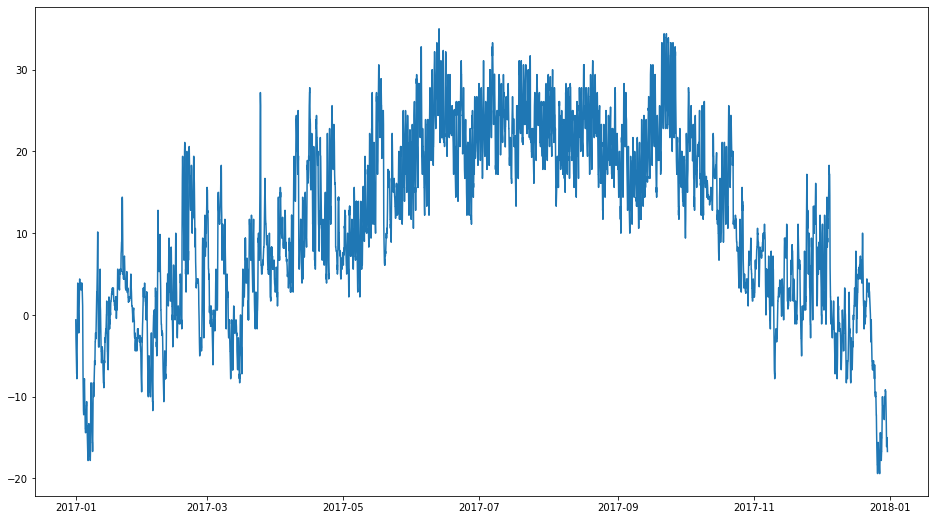

In [35]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_temp_hourly_mean)
plt.show()

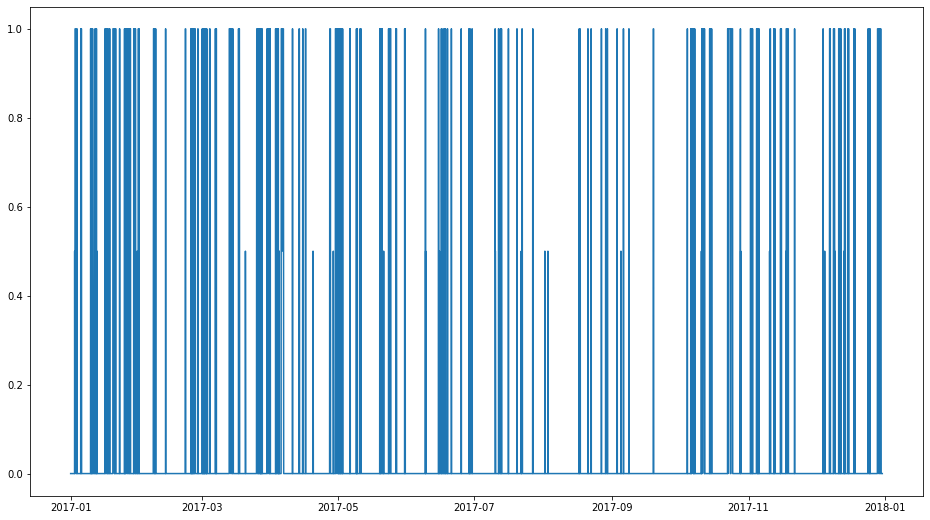

In [36]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_precip_hourly)
plt.show()

## Weather Daily

In [37]:
chicago_weather_2017_temp_daily_min = chicago_weather_2017.groupby("Date")["min_temp"].mean()
chicago_weather_2017_temp_daily_max = chicago_weather_2017.groupby("Date")["max_temp"].mean()
chicago_weather_2017_temp_daily_mean = chicago_weather_2017.groupby("Date")["mean_temp"].mean()
chicago_weather_2017_precip_daily = chicago_weather_2017.groupby("Date")["precip"].mean()

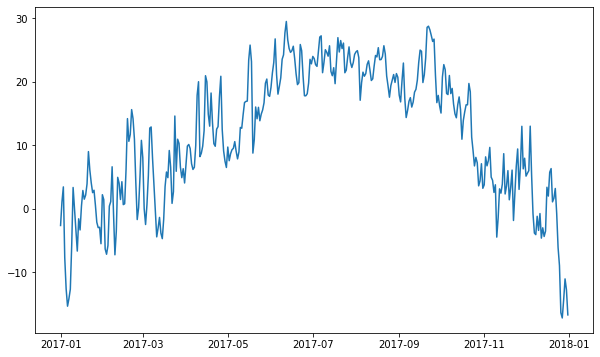

In [38]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chicago_weather_2017_temp_daily_mean)

plt.show()

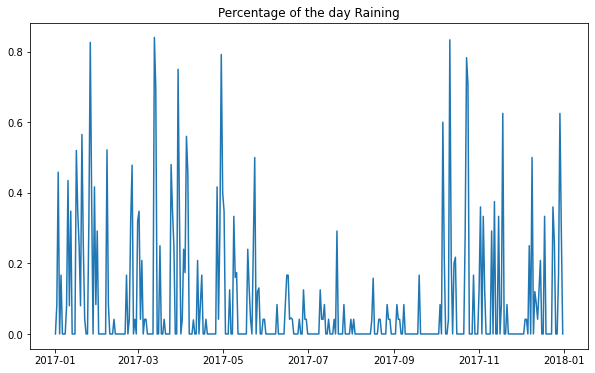

In [47]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(chicago_weather_2017_precip_daily)
ax.set_title("Percentage of the day Raining")
ax.set

plt.show()

## Weather Month

In [40]:
chicago_weather_2017_temp_monthly_min = chicago_weather_2017.groupby("Month")["min_temp"].mean()
chicago_weather_2017_temp_monthly_max = chicago_weather_2017.groupby("Month")["max_temp"].mean()
chicago_weather_2017_temp_monthly_mean = chicago_weather_2017.groupby("Month")["mean_temp"].mean()
chicago_weather_2017_precip_monthly = chicago_weather_2017.groupby("Month")["precip"].mean()

KeyError: 'mean_temp'

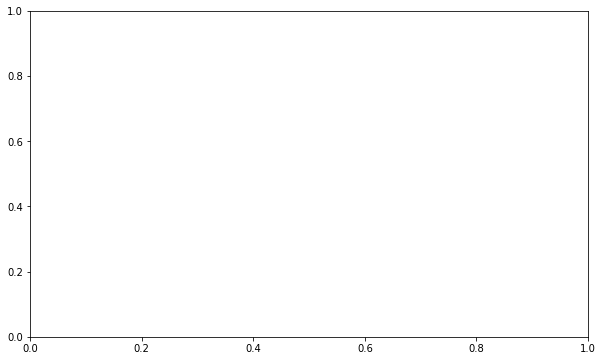

In [48]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.boxplot(x = chicago_weather_2017_temp_monthly_mean.index.get_level_values('Month'), y= chicago_weather_2017_temp_monthly_mean['mean_temp'], ax = ax)

plt.show()

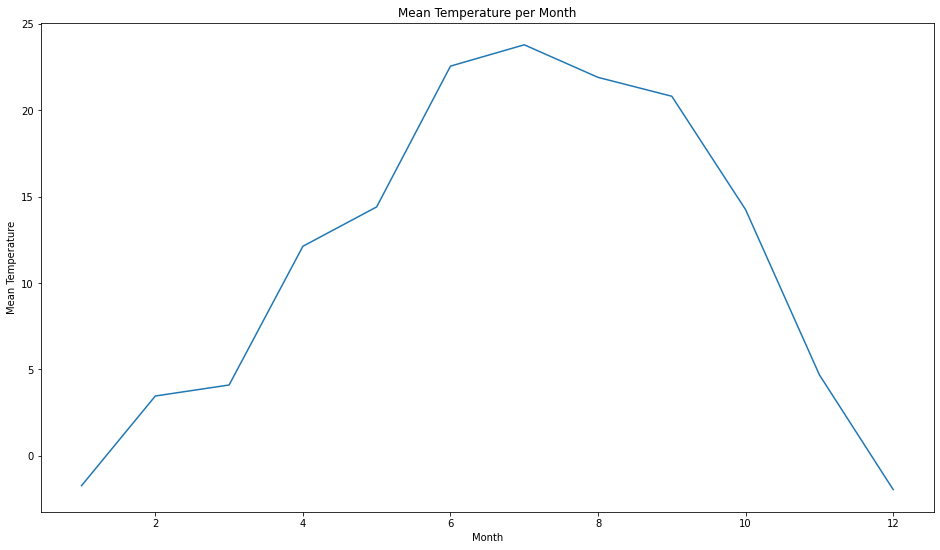

In [41]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_temp_monthly_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Mean Temperature')
ax.set_title("Mean Temperature per Month")

plt.show()

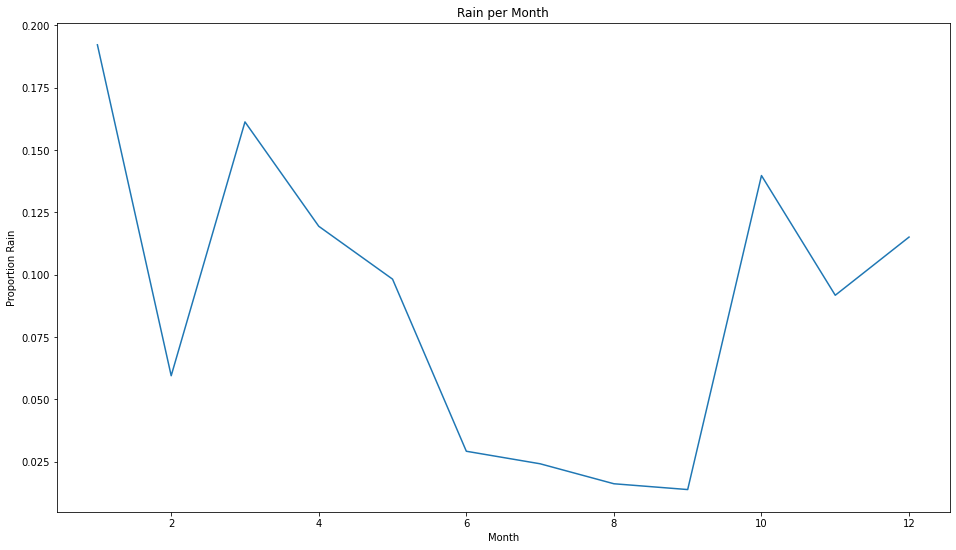

In [42]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_precip_monthly)

ax.set_xlabel('Month')
ax.set_ylabel('Proportion Rain')
ax.set_title("Rain per Month")

plt.show()

# Comination of Bike Usage Data and Weather Data

### Rescale Data - Bike Usage

In [43]:
chicago_data_Date_avail_rescaled = (chicago_data_Date_avail-chicago_data_Date_avail.min())/(chicago_data_Date_avail.max()-chicago_data_Date_avail.min())

### Rescale Data - Weather

In [44]:
chicago_weather_2017_precip_daily_rescaled = (chicago_weather_2017_precip_daily-chicago_weather_2017_precip_daily.min())/(chicago_weather_2017_precip_daily.max()-chicago_weather_2017_precip_daily.min())
chicago_weather_2017_temp_daily_mean_rescaled = (chicago_weather_2017_temp_daily_mean-chicago_weather_2017_temp_daily_mean.min())/(chicago_weather_2017_temp_daily_mean.max()-chicago_weather_2017_temp_daily_mean.min())

## Plot Bike Usage/Weather

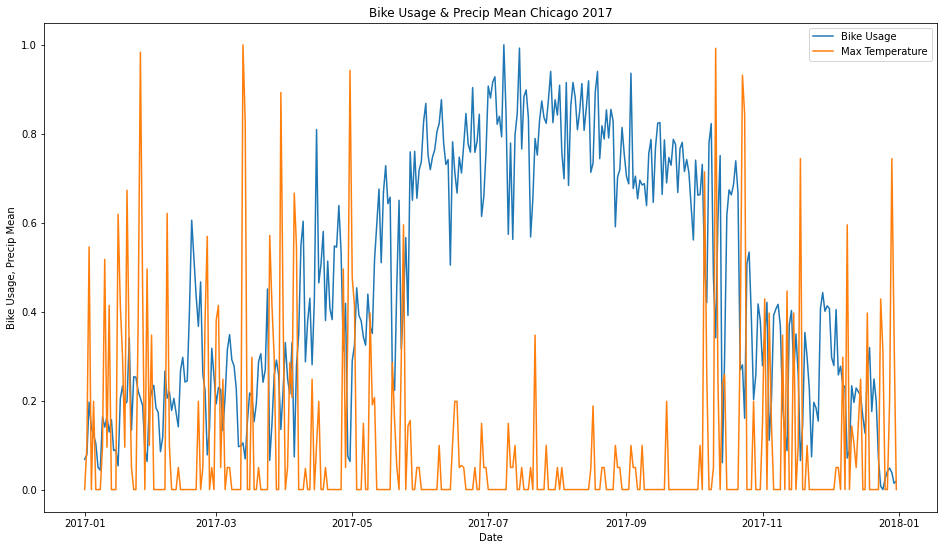

In [45]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_2017_precip_daily_rescaled, label='Max Temperature')

ax.set_title('Bike Usage & Precip Mean Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Precip Mean')
ax.legend()

plt.show()

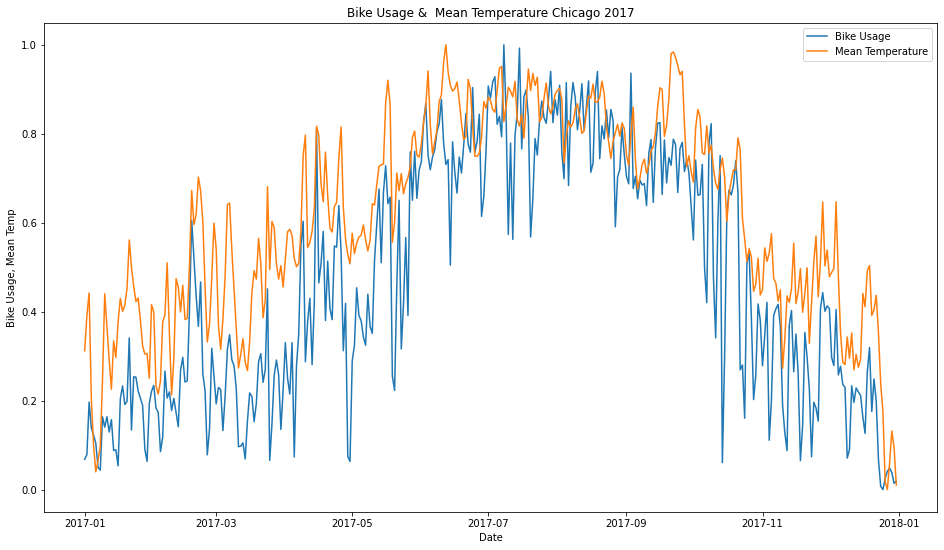

In [46]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_2017_temp_daily_mean_rescaled, label='Mean Temperature')

ax.set_title('Bike Usage &  Mean Temperature Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Mean Temp')
ax.legend()

plt.show()